In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.plotting.register_matplotlib_converters()
import seaborn as sns

# Context

In [75]:
train = pd.read_csv('./train.csv') # загружаем датасет
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

Text(0.5, 1.0, 'Missing values heatmap')

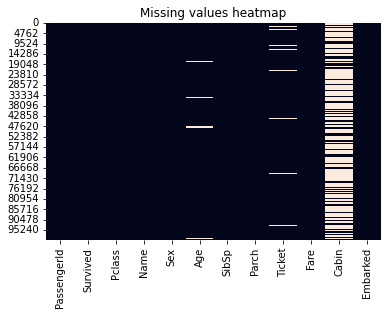

In [76]:
train.isnull().sum() # сколько пропущено данных
sns.heatmap(train.isnull(), cbar = False).set_title("Missing values heatmap") # график

In [77]:
train.Embarked.fillna(train.Embarked.mode()[0], inplace = True) # заполняем НАН значения модой по фиче
train.Cabin = train.Cabin.fillna('NA') # создали новую категорию
train['Salutation'] = train.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) # убрали лишнее в имени
grp = train.groupby(['Sex', 'Pclass']) 
grp.Age.apply(lambda x: x.fillna(x.median())) # медиана по полу и классу

0        44.00
1        31.00
2         0.33
3        19.00
4        25.00
         ...  
99995    62.00
99996    66.00
99997    37.00
99998    51.00
99999    55.00
Name: Age, Length: 100000, dtype: float64

In [78]:
train.Age.fillna(train.Age.median(), inplace = True) # заполняем медиана=у по возрасту

In [79]:
train.nunique()

PassengerId    100000
Survived            2
Pclass              3
Name            92144
Sex                 2
Age               173
SibSp               7
Parch               8
Ticket          75331
Fare            15935
Cabin           26993
Embarked            3
Salutation       3953
dtype: int64

# Data exploration

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

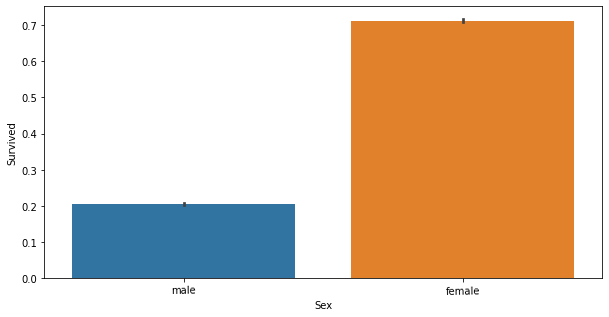

In [69]:
fix, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=1)
sns.barplot(x='Sex',y='Survived', data=train) # кол-во выживших по полу

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

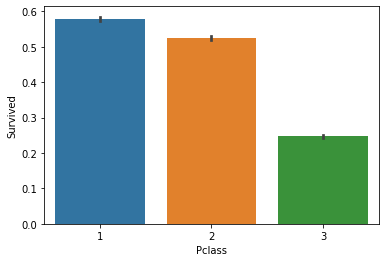

In [70]:
sns.barplot(x='Pclass', y='Survived', data=train) # кол-во выживших по классу

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

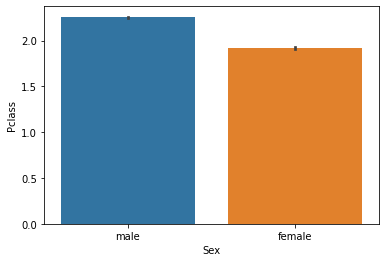

In [72]:
sns.barplot(x='Sex', y='Pclass', data=train) # в какик классах более всего м/ж

<AxesSubplot:xlabel='Age', ylabel='Survived'>

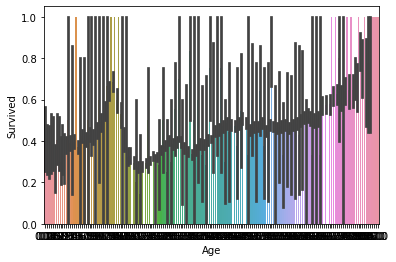

In [73]:
sns.barplot(x='Age', y='Survived', data=train) # график по возрасту, который как по мне ничего не дает

# Summary

Мы узнали, что выжило больше женщин, а так же люди из 1го класса. А так же лично у меня не понятно, что там с возрастом
We learned that more women survived, as well as people from the 1st grade. And also, personally, I don't know what's going on with age.